## Question 1
Consider the following example from Efron and Tibshirani (1993). When a drug company introduces new medications, they are sometimes required to show "bioequivalence". Or, in other words, to demonstrate that the new drug is not substantially different than the current treatment.

The table below shows eight subjects who used medical patches to infuse a certain hormone into the blood. Each subject recieved three treatments: placebo, old-patch, new-patch.


|subject	|placebo	|old	|new	|old - placebo	|new - old	|
|:---:	|---:	|---:	|---:	|---:	|---:	|
|1	|9243	|17649	|16449	|8406	|-1200	|
|2	|9671	|12013	|14614	|2342	|2601	|
|3	|11792	|19979	|17274	|8187	|-2705	|
|4	|13357	|21816	|23798	|8459	|1982	|
|5	|9055	|13850	|12560	|4795	|-1290	|
|6	|6290	|9806	|10157	|3516	|351	|
|7	|12412	|17208	|16570	|4796	|-638	|
|8	|18806	|29044	|26325	|10238	|-2719	|


Let:
- Z = old - placebo
- Y = new - old

The Food and Drug Administration (FDA) requirement for bioequivalence is the $|\theta|\leq0.20$, where $\theta=\frac{\mathbb{E}\left[Y\right]}{\mathbb{E}\left[Z\right]}$

The function "bioequals" below is a program that (a) calculates the plug-in estimate of $\theta$, which is equal to $\hat{\theta}=\frac{\bar{Y}}{\bar{Z}}$


In [1]:
import pandas as pd
# put the data in a dataframe
data = dict(subject=range(1, 9),
           placebo=[9243, 9671, 11792, 13357, 9055, 6290, 12412, 18806],
           old=[17649, 12013, 19979, 21816, 13850, 9806, 17208, 29044],
           new=[16449, 14614, 17274, 23798, 12560, 10157, 16570, 26325],
           old_placebo=[8406, 2342, 8187, 8459, 4795, 3516, 4796, 10238],
           new_old=[-1200, 2601, -2705, 1982, -1290, 351, -638, -2719])
data = pd.DataFrame(data)
data

,subject,placebo,old,new,old_placebo,new_old
0,1,9243,17649,16449,8406,-1200
1,2,9671,12013,14614,2342,2601
2,3,11792,19979,17274,8187,-2705
3,4,13357,21816,23798,8459,1982
4,5,9055,13850,12560,4795,-1290
5,6,6290,9806,10157,3516,351
6,7,12412,17208,16570,4796,-638
7,8,18806,29044,26325,10238,-2719


In [2]:
def bioequals(ycol, zcol, df):
    '''
    takes a pandas dataframe and pointers to the old, new and placebo columns to calculate the bio-equivalence
    '''
    # get the old, new and placebo values values
    Y = df[ycol]
    Z = df[zcol]
    return Y.mean() / Z.mean()
    
bioequals("new_old", "old_placebo", data)

-0.07130609590256017

Here we use the bootstrap method with B=1000 replications to calculate the 95% confidence interval for the bioequivalence.

In [3]:
import numpy as np
np.random.seed(12345)
B = 1000
N = data.shape[0]
ycol = "new_old"
zcol = "old_placebo"

# randomly sample the subjects and make the calculation
# this can be done by sampling the index as a discrete uniform distribution
ell = np.zeros(B)
for b in range(B):
    # sample index values
    idx = np.random.randint(N, size=N)
    
    # get the data from the df
    sample = data.loc[idx, [ycol, zcol]]
    
    # get the bioequivalence
    ell[b] = bioequals(ycol, zcol, sample)

# get the mean and std deviation and calculate the 95% CI
ell_mean = np.mean(ell)
ell_std = np.std(ell)
print(f"The bootstrapped mean in {ell_mean:0.3f} and the standard deviation is {ell_std:0.3f}")
print(f"95% CI for bioequivalence is ({ell_mean-1.96*ell_std:0.2f}, {ell_mean+1.96*ell_std:0.2f})")

The bootstrapped mean in -0.060 and the standard deviation is 0.104
95% CI for bioequivalence is (-0.26, 0.14)


The 95% CI for bioequivalence contains a portion outside of the FDA requirement, so we can not be certain with 95% confidence that the new drug achieves bioequivalence within the required FDA threshold.

## Question 2
Air Secure wishes to open a number of new service desks, guaranteeing that in the long run 90% of their customers do not have to wait longer than 8 minutes in a waiting queue before they are served. Preliminary research by Air Secure showed that on arrival customers always choose the smallest queue and remain there until served. This research also investigated the passengers inter-arrival time (in minutes) and the service time. The results are summarized in data.csv. The data for the first four passengers are provided below.

|inter_arrival_time	|service_time	|
|---:	|---:	|
|2.1230325064814	|3.83455057136373	|
|0.304277254841897	|3.07898542818172	|
|0.162593146778897	|3.87336623034977	|
|0.183088166798198	|8.55428148088529	|

A Discrete-Event simulation will be conducted using Python to determine:
- How many service desks should be minimally available to meet the service requirements
- Service requirement is that customers should not have to wait longer than 8 minutes with probability 90% or $\mathbb{P}\left(X\leq8\right)=0.9$

The run the simulation for T = 3000 units of time

In [4]:
def get_cdf(x):
    # return a cdf from a vector
    n = len(x)
    x = np.sort(x)
    pos = np.array(range(1, n+1))
    prb = pos / n
    
    # return values, and probabilities
    return x, prb

Expectations (minutes):

Expected customer demand will be for 75 customers and an expected total service time of 175 minutes per hour



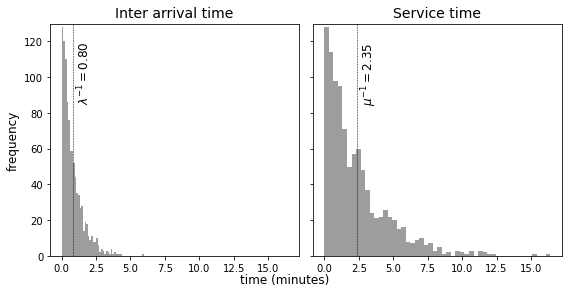

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the inputs
inputs = pd.read_csv('data.csv')

# plot the variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)
axes = [ax1, ax2]
label = dict(inter_arrival_time=r'\lambda^{-1}', service_time=r'\mu^{-1}')
for field, ax in zip(inputs.columns, axes):    
    inputs[field].hist(bins=50, ax=ax, color=[60/255, 60/255, 60/255], alpha=0.5)
    ax.set_title(field.replace("_", " ").capitalize(), fontsize=14)
    
    # draw the mean values and label as mu and lambda
    mu = inputs[field].mean()
    ax.vlines(mu, ymin=0, ymax=130, color='black', alpha=1, lw=0.5, ls='--')
    ax.text(mu+0.2, 120, f'${label[field]} = {mu:0.2f}$', rotation=90, ha='left', va='top', fontsize=12)

# turn off the grids
[ax.grid(b=None) for ax in axes]
# plt.xlabel("time (minutes)")
fig.text(0.5, 0.0, 'time (minutes)', ha='center', fontsize=12)
ax1.set_ylabel("frequency", fontsize=12)

# save the figure
plt.ylim([0, 130])
plt.tight_layout()
plt.savefig("inputs_hists.png")

print("Expectations (minutes):")
means = inputs.mean()
print()

# hourly demand
mu = means['service_time']
lam = means['inter_arrival_time']
throughput = 60 / lam
total_time = throughput * mu
print(f"Expected customer demand will be for {throughput:0.0f} customers and an expected total service time of {total_time:0.0f} minutes per hour\n")

So on average, we will have a customer arriving every 0.8 minutes and requiring a service time of 2.35 minutes. Or in other words 75 customers per hour for a total of 175 minutes service demand

In [6]:
# to satisfy this requirement, assuming that service desks are always available:
import math
min_desks = 175 / 60
print("Minimum desk requirement is", math.ceil(min_desks))

# we could also do this
desks = math.ceil(mu/lam)
print("alt method.", desks)

Minimum desk requirement is 3
alt method. 3


Plot the ECDFs of the inputs

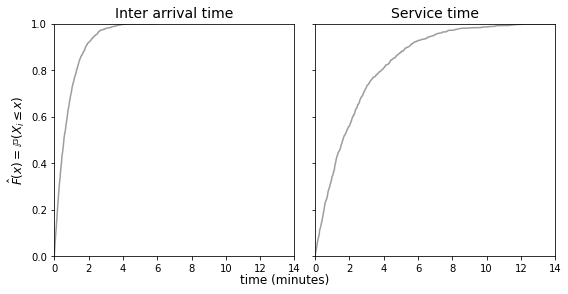

In [7]:
# plot the variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)
axes = [ax1, ax2]
label = dict(inter_arrival_time=r'\lambda^{-1}', service_time=r'\mu^{-1}')
for field, ax in zip(inputs.columns, axes):    
    # create a cdf from the samples
    x, ecdf = get_cdf(inputs[field].values)
    
    # plot the result
    sns.lineplot(x=x, y=ecdf, color=[60/255, 60/255, 60/255], alpha=0.5, ax=ax)    
    ax.set_title(field.replace("_", " ").capitalize(), fontsize=14)
    
    # convert the x labels to integers
    tlabels = range(0, 16, 2)
    ax.set_xticks(tlabels)
    ax.set_xticklabels([str(int(t)) for t in tlabels])
    
# set labels
ax1.set_ylabel(r"$\hat{F}(x)=\mathbb{P}\left(X_i\leq x\right)$", fontsize=12)
fig.text(0.5, 0.0, 'time (minutes)', ha='center', fontsize=12)


# save the figure
plt.ylim([0, 1])
plt.xlim([0, 14])
plt.tight_layout()
plt.savefig("inputs_ecdf.png")

### Results analysis

In [8]:
# get the simulation results
df = pd.read_csv(r'babysim\sim_results.csv')
df.head()

,time_stamp,clnt_id,comp_id,event,scenario
0,1.082782,0,q0,put,1
1,1.082782,0,q0,get,1
2,1.082782,0,s0,put,1
3,1.298584,1,q0,put,1
4,1.964986,0,s0,get,1


In [9]:
def get_queuing(df):
    '''
    for clients that didn't queue, we need to assign a zero queue duration
    '''
    df['duration'] = df.groupby(['scenario', 'comp_id', 'clnt_id'])['time_stamp'].diff()
    return df[(df['comp_id'].str[0]=='q')&(df['event']=='get')]

In [10]:
# calculate the durations for each customer
queuing = get_queuing(df)
# queuing.head()
# queuing.to_csv('check_qs.csv', index=False)

Need to consider customers that didn't queue at all

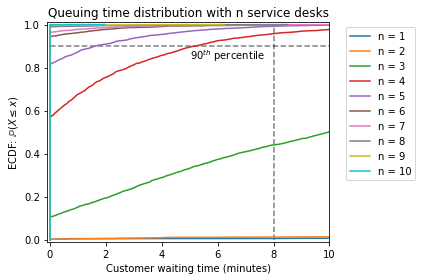

In [11]:
# for each scenario construct a cdf of the waiting time
fig, ax = plt.subplots()
for scn, durations in queuing.groupby(['scenario']):
    # get the cdf of the wait times
    vals, prbs = get_cdf(durations['duration'])
    
    plt.plot(vals, prbs, label=f"n = {scn}")
    
plt.legend()
plt.title('Queuing time distribution with n service desks')
plt.vlines(8, ymin=0, ymax=1, color='black', alpha=0.5, ls='--')
plt.hlines(0.9, xmin=0, xmax=10, color='black', alpha=0.5, ls='--')
plt.xlim([-0.1, 10])
plt.ylim([-0.01, 1.01])
plt.xlabel("Customer waiting time (minutes)")
plt.ylabel(r'ECDF: $ \mathbb{P} \left(X \leq x \right) $')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.text(5, 0.895,"$90^{th}$ percentile", va='top', ha='left')
plt.tight_layout()
plt.savefig('queuing.png')

          mean   std     n  lower  upper
scenario                                
1         0.00  0.07  1295   0.00   0.01
2         0.01  0.11  2529   0.01   0.02
3         0.44  0.50  3575   0.42   0.46
4         0.96  0.20  3695   0.95   0.96
5         0.99  0.09  3720   0.99   0.99
6         1.00  0.04  3676   1.00   1.00
7         1.00  0.03  3826   1.00   1.00
8         1.00  0.02  3699   1.00   1.00
9         1.00  0.00  3778   1.00   1.00
10        1.00  0.00  3696   1.00   1.00


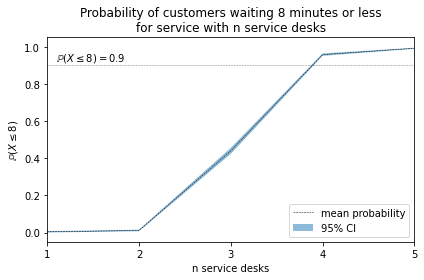

In [22]:
# also calculate the 95% CI probability of waiting for less than or equal to 8 minutes
# create a variable that indicates whether customer service condition is satisfied
# based on the "Finite Horizon Simulation" formulas we use S/sqrt(N)
csat = queuing.loc[:, ['scenario', 'duration']]
csat['satisfaction'] = csat['duration'].map(lambda x: 1 if x <= 8 else 0)

# calculate the CIs
means = csat.groupby(['scenario'])['satisfaction'].agg(np.mean).rename('mean')
stds = csat.groupby(['scenario'])['satisfaction'].agg(np.std).rename('std')
ns = csat.groupby(['scenario'])['satisfaction'].agg('count').rename('n')
ci = pd.concat([means, stds, ns], axis=1)
ci['lower'] = ci['mean'] - 1.96*ci['std'] / np.sqrt(ci['n'])
ci['upper'] = ci['mean'] + 1.96*ci['std'] / np.sqrt(ci['n'])

# plot the results with a CI band and mean line
fig, ax = plt.subplots()
plt.fill_between(ci.index, ci['upper'], ci['lower'], alpha=0.5, label='95% CI')
plt.plot(ci.index, ci['mean'], lw=0.5, color='black', ls='--', label='mean probability')
plt.hlines(0.9, xmin=0, xmax=10, color='black', alpha=0.5, lw=0.5, ls='--')
plt.text(1.1, 0.905,r"$\mathbb{P}\left(X\leq 8 \right)=0.9$", va='bottom', ha='left')
plt.xlim([1,5])
plt.title("Probability of customers waiting 8 minutes or less\nfor service with n service desks")
xticks = range(1, 6)
plt.xticks(xticks)
plt.xlabel("n service desks")
plt.ylabel(r"$\mathbb{P}\left(X\leq 8 \right)$")
plt.legend(loc='lower right')

# print the results
plt.tight_layout()
plt.savefig("probabilities.png")
print(ci.round(2))

In [13]:
queuing.head()

,time_stamp,clnt_id,comp_id,event,scenario,duration
1,1.082782,0,q0,get,1,0.000000
5,1.964986,1,q0,get,1,0.666401
9,2.906407,2,q0,get,1,0.000000
14,3.349034,3,q0,get,1,0.218192
18,3.889820,4,q0,get,1,0.725200


## System utilisation and throughput
Show the system utilisation and throughput for each scenario

In [14]:
# throughput from number of server gets
sdf = df[(df['comp_id'].str[0]=='s')]
served = sdf[sdf['event']=='get']
print("Throughput:")
totals = served.groupby(['comp_id', 'scenario'])['time_stamp'].agg('count').unstack(['comp_id'])
totals['total'] = totals.sum(axis=1)
print(totals.fillna(0).astype(int))

# utilised time from get-put
print()
print("Utilisation:")
sutil = served.groupby(['comp_id', 'scenario'])['duration'].agg(np.sum).unstack(['comp_id'])
sutil['overall'] = sutil.sum(axis=1) / sutil.index.values
sutil = (sutil.fillna(0) / 30).round(1)
# sutil                                                                                
print(sutil)

Throughput:
comp_id     s0    s1    s2   s3   s4   s5   s6   s7   s8   s9  total
scenario                                                            
1         1294     0     0    0    0    0    0    0    0    0   1294
2         1247  1280     0    0    0    0    0    0    0    0   2527
3         1170  1209  1193    0    0    0    0    0    0    0   3572
4          910   938   892  953    0    0    0    0    0    0   3693
5          728   742   723  758  766    0    0    0    0    0   3717
6          642   600   606  604  590  631    0    0    0    0   3673
7          548   584   523  537  523  544  565    0    0    0   3824
8          466   443   475  458  481  442  461  470    0    0   3696
9          406   396   427  459  433  399  406  423  428    0   3777
10         351   369   408  357  362  353  381  359  383  370   3693

Utilisation:
comp_id     s0    s1    s2    s3    s4    s5    s6    s7    s8    s9  overall
scenario                                                            

## Queue occupancy and service utilisation
Let's look at queue occupancy over time

In [15]:
from matplotlib.patches import Rectangle
import warnings; warnings.simplefilter('ignore')

In [23]:
(3572-2527)/3572


0.2925531914893617

In [17]:
window=[60, 1500]
scenario = 3
# figsize = [20,5]
pad = 60

### Queue occupancy (queue length)

In [18]:
# get the cueuing for our successful scenario, which is 4
occ = df[(df['scenario']==scenario)&(df['comp_id'].str[0]=='q')&(df['time_stamp']<=window[1]+pad)]
occ['counter'] = occ['event'].map(lambda x: -1 if x=='get' else 1 )

# group by component and take the cumulative sum
occ['occupation'] = occ.groupby(['comp_id'])['counter'].agg(np.cumsum)

# create counter labels
occ['label'] = occ['comp_id'].map(lambda x: f"service desk {int(x[1])+1}")

# get the plot order and drop redundant data and duplicates
queues = occ['comp_id'].unique()
queues.sort()
order = [f"service desk {int(q[1:])+1}" for q in queues]
occ = occ.drop(['clnt_id', 'comp_id', 'event', 'scenario', 'duration', 'counter'], axis=1).drop_duplicates(
    subset=['time_stamp', 'label'], keep='last')

### Server utilisation
Show patches that represent the server utilisation

In [19]:
# get the server times for scenario 4
utl = df[(df['scenario']==scenario)&(df['comp_id'].str[0]=='s')&(df['time_stamp']<=window[1]+pad)]

# establish the counter positions
padding = 0.1

# get servers and estbish bottom corners
servers = utl['comp_id'].unique()
servers.sort()
num_servers = len(servers)
y_pos = {s: idx+padding for idx, s in enumerate(servers[::-1])}
height = 1 - 2*padding

# get the left corners as the put times
patch_data = utl[utl['event']=='put']
patch_data['bottom'] = patch_data['comp_id'].map(y_pos)

# join with the gets to calculate the durations
gets = utl[utl['event']=='get'].set_index(['comp_id', 'clnt_id'])
patch_data = patch_data.join(gets['time_stamp'].rename('end'), on=['comp_id', 'clnt_id'])
patch_data['duration'] = patch_data['end'] - patch_data['time_stamp']

# create the same labels as above to match the colours
patch_data['label'] = patch_data['comp_id'].map(lambda x: f"service desk {int(x[1])+1}")

Also relevent is the time that each customer takes to service. We can show a rolling 60 minute centered to show peaks in demand, but take into account their service times.

### Customer Demand
Show aggregate customer demand resampled to 5 or 10 minute intervals

In [20]:
# get the minimum time of each client in the system
# injection_times = pd.TimedeltaIndex(df[(df['scenario']==4)].groupby(['clnt_id'])['time_stamp'].agg('min'), unit='m')
injection_times = df[(df['scenario']==scenario)].groupby(['clnt_id'])['time_stamp'].agg('min')
service_demand = patch_data.loc[:, ['clnt_id', 'duration']].join(injection_times, on=['clnt_id'])
service_demand = service_demand.set_index(pd.TimedeltaIndex(service_demand['time_stamp'], unit='m'))

# we will look at a centered rolling one hour demand sampled every 10 minutes
interval = 10
roll_window = 60
resampled = service_demand['duration'].resample(f'{interval}T').sum().rolling(int(roll_window/interval), center=True).sum()
resampled.head()

time_stamp
00:00:36.048569           NaN
00:10:36.048569           NaN
00:20:36.048569           NaN
00:30:36.048569    137.172895
00:40:36.048569    123.302244
Freq: 10T, Name: duration, dtype: float64

### Plot all of the results

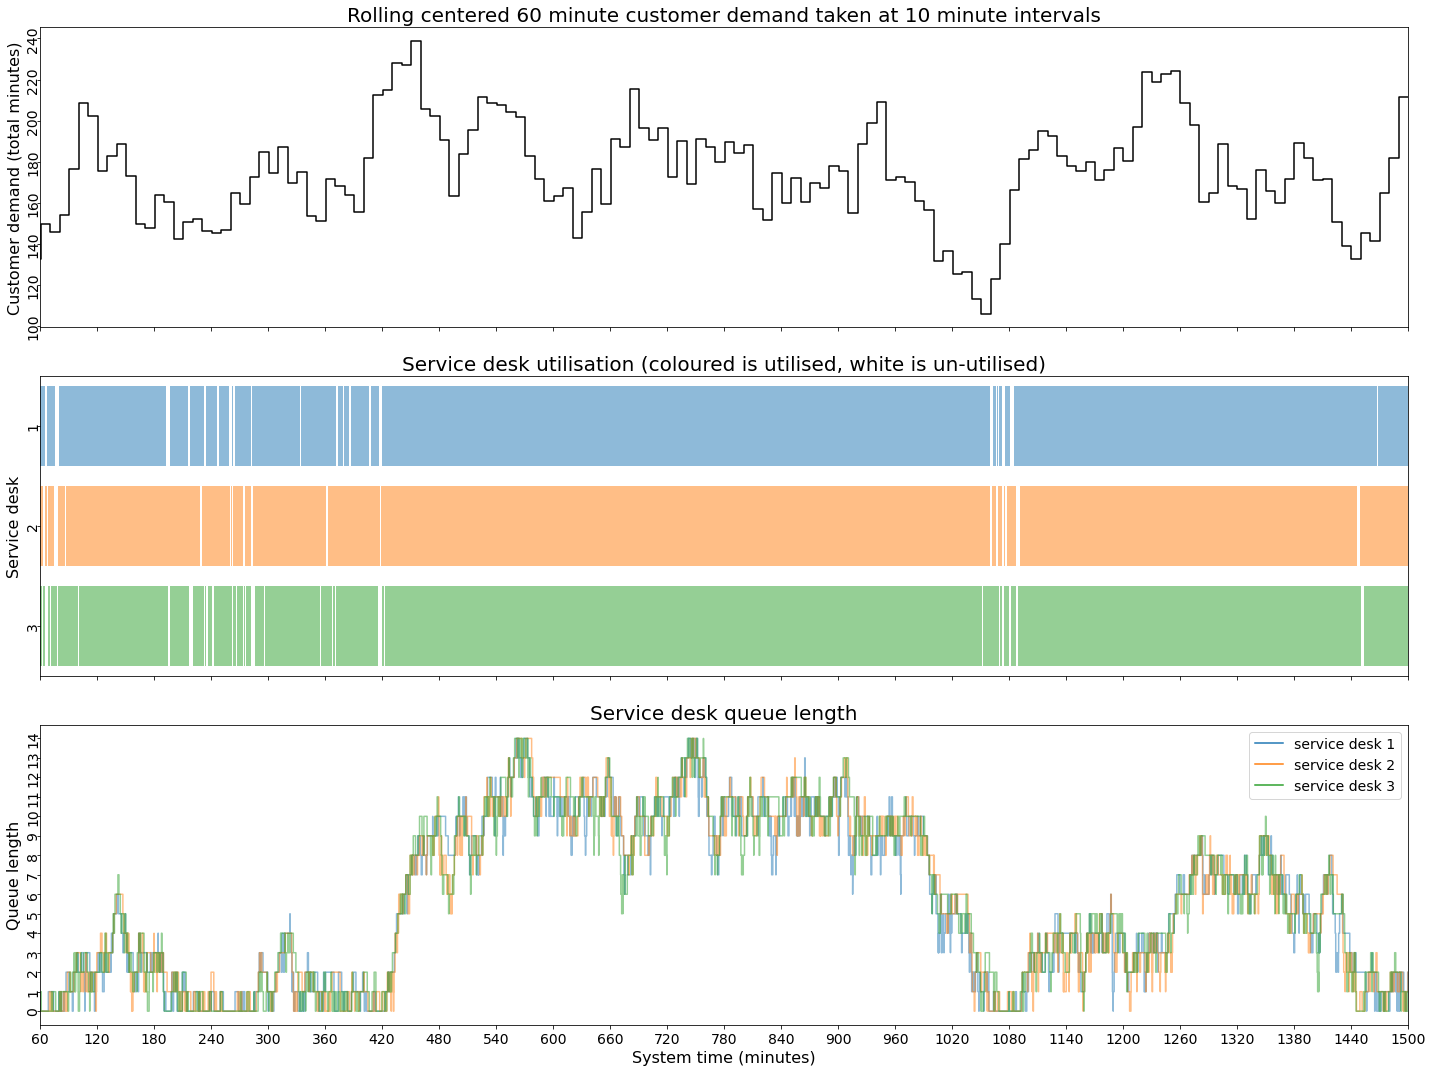

In [21]:
# create the canvas
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
title_fs = 20
label_fs = 16
tick_fs = 14

# plot the demand
x_vals = list(resampled.index.total_seconds()/60)
sns.lineplot(x=x_vals, y=resampled.values, drawstyle='steps-post', color='black', ax=ax1)

# plot the queuing
lines = sns.lineplot(x='time_stamp', y='occupation', hue='label', data=occ,
             drawstyle='steps-post', hue_order=order, alpha=0.5, ax=ax3)

# plot the utilisation
colours = {l.get_label():l.get_color() for l in lines.get_lines() if l.get_label()[0] == 's'}
patch_data['colour'] = patch_data['label'].map(colours)
for idx, row in patch_data.iterrows():
    patch = Rectangle(xy=(row['time_stamp'], row['bottom']), width=row['duration'], height=height,
                     color=row['colour'], linewidth=0, alpha=0.5)
    ax2.add_patch(patch)

# set the ylims for ax2
ax2.set_ylim([0,num_servers])
plt.xlabel("System time (minutes)", fontsize=label_fs)

# set labels for subplots
# customer demand
ax1.set_title("Rolling centered 60 minute customer demand taken at 10 minute intervals", fontsize=title_fs)
ax1.set_ylabel("Customer demand (total minutes)", fontsize=label_fs)
ylabels1 = [str(int(l)) for l in ax1.get_yticks()]
ax1.set_yticklabels(labels=ylabels1, fontsize=tick_fs, rotation=90, ha='center', va='center')

# service desks
ax2.set_title("Service desk utilisation (coloured is utilised, white is un-utilised)", fontsize=title_fs)
yticks2 = np.linspace(start=0.5, stop=num_servers-0.5, num=num_servers)
ytick_labels2 = [str(idx) for idx in range(num_servers, 0, -1)]
ax2.set_yticks(yticks2)
ax2.set_yticklabels(ytick_labels2, fontsize=tick_fs, rotation=90, ha='center', va='center')
ax2.set_ylabel("Service desk", fontsize=label_fs)

# queueing
ax3.set_title("Service desk queue length", fontsize=title_fs)
max_q_len = occ['occupation'].max()
yticks3 = range(0, max_q_len + 1)
ax3.set_yticks(yticks3)
ylabels3 = [str(l) for l in yticks3]
ax3.set_yticklabels(labels=ylabels3, rotation=90, ha='center', va='center', fontsize=tick_fs)
ax3.set_ylabel("Queue length", fontsize=label_fs)

# clear legend title from ax3
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles=handles[1:], labels=labels[1:], fontsize=tick_fs)

# increase size of ax3 tick labels
xticks = range(window[0], window[1] + roll_window, roll_window)
ax3.set_xticks(xticks)
xtick_labels = [str(int(l)) for l in xticks]
ax3.set_xticklabels(xtick_labels, fontsize=tick_fs)

# save the figure
plt.xlim(window)
# plt.xlim([60, 1440])
plt.tight_layout()
plt.savefig(f"system{scenario}_snapshot.png", dpi=300)